In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import FreqRespPy

from FreqRespPy.data_search import get_target_file_list, open_target_file
from scipy import signal
#from FreqRespPy.target_calc import mean_freq_response

In [2]:
def to_linear(x):
     return 10**(x / 10.0)    

In [3]:
def to_dB(x):
    return 10 * np.log10(x)

In [35]:
def mean_freq_response(target_df):
    target_df = target_df.apply(pd.to_numeric)
    target_df_lin = to_linear(target_df)
    row_means_lin = target_df_lin.mean(axis=1)
#   row_means_sem = target_df_lin.sem
    row_means = to_dB(row_means_lin)
#   print(row_means)
#   return (row_means, row_means_sem)
    return row_means

In [36]:
data_directory = 'C:/Users/kevinb/Documents/GitHub/FreqResp/data/'
data_files = get_target_file_list(data_directory)
print(data_files)

['FT_region_EV9_EVD_Comp0_Region 1.csv', 'FT_region_EV9_EVD_Comp0_Region 2.csv', 'FT_region_EV9_EVD_Comp0_Region 45.csv', 'FT_region_EV9_EVD_Comp0_Region 46.csv', 'FT_region_EV9_EVD_Comp1_Region 1.csv', 'FT_region_EV9_EVD_Comp1_Region 2.csv', 'FT_region_EV9_EVD_Comp1_Region 45.csv', 'FT_region_EV9_EVD_Comp1_Region 46.csv', 'FT_region_RAW_EV9_Region 1.csv', 'FT_region_RAW_EV9_Region 2.csv', 'FT_region_RAW_EV9_Region 45.csv', 'FT_region_RAW_EV9_Region 46.csv']


In [37]:
mean_response_output = []

for file in data_files:
    meta, df = open_target_file(data_directory, file)
    #     print(df)
    #     print(df.dtypes)
    
    mean_response = mean_freq_response(df)
    mean_response_output.append(mean_response)

In [38]:
df_output = pd.concat(mean_response_output, axis=1)

In [39]:
type(df_output)
df_output.shape
df_output.columns.values
df_output.columns = [file.replace(' ', '_') for file in data_files]

In [40]:
data_files = [file.replace(' ', '_') for file in data_files]
data_files = [file[:-4] for file in data_files if file.endswith('.csv')]
data_files = [file[10:] for file in data_files if file.startswith('FT_region_')]

In [41]:
df_output.columns = data_files

In [56]:
target1= df_output.iloc[:,0]   # Fish1
target2= df_output.iloc[:,1]   # Fish2
target3= df_output.iloc[:,2]   # Fish3
target4= df_output.iloc[:,3]   # Fish4
freq=df.index


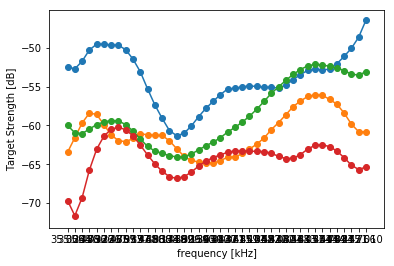

In [60]:
plt.scatter(freq,target1, zorder=1)
plt.plot(freq,target1,zorder=2)
plt.xlabel('frequency [kHz]')
plt.ylabel('Target Strength [dB]')

plt.scatter(freq,target2, zorder=3)
plt.plot(freq,target2,zorder=4)

plt.scatter(freq,target3, zorder=5)
plt.plot(freq,target3,zorder=6)

plt.scatter(freq,target4, zorder=7)
plt.plot(freq,target4,zorder=8)



1 [ 0  2  6 12 20 30 42 56 72 90]
2 [ 0  3  8 15 24 35 48 63 80 99]
3 [  0   4  10  18  28  40  54  70  88 108]
4 [  0   5  12  21  32  45  60  77  96 117]
5 [  0   6  14  24  36  50  66  84 104 126]
6 [  0   7  16  27  40  55  72  91 112 135]
7 [  0   8  18  30  44  60  78  98 120 144]
8 [  0   9  20  33  48  65  84 105 128 153]
9 [  0  10  22  36  52  70  90 112 136 162]
10 [  0  11  24  39  56  75  96 119 144 171]
11 [  0  12  26  42  60  80 102 126 152 180]
12 [  0  13  28  45  64  85 108 133 160 189]


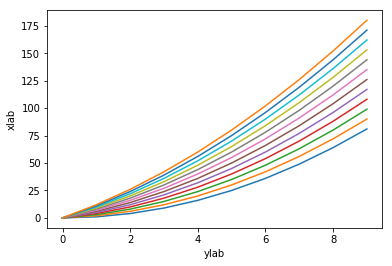

In [53]:
## need to integrate file names into this to loop across fish tracks
x = np.arange(10)
i = 0
while i < len(data_files):
    plt.plot(x, i*x+x*x)
    plt.xlabel('ylab')
    plt.ylabel('xlab')
    i = i + 1
    print (i, i*x+x*x)

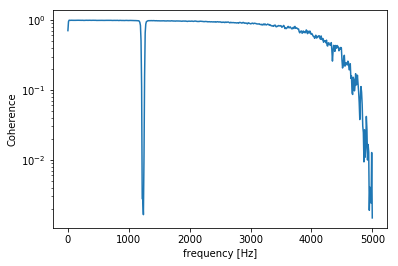

In [48]:
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(1, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)


f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()